<center>
    <h1> ILI286 - Computación Científica II  </h1>
    <h2> Tarea 2 </h2>
    <h2> 07 de septiembre del 2016</h2>
    <h4> Roberto Felipe Fuentes Zenteno - 201173037-2 - roberto.fuentes@alumnos.usm.cl</h4>
</center>



# Tabla de Contenidos
* [Introducción](#intro)
* [Desarrollo y análisis de resultados](#des)
* [Algoritmos Integración Númerica](#int)
    - [Pregunta 1](#pregunta1)
    - [Pregunta 2](#pregunta2)
    - [Pregunta 3](#pregunta3)
* [Aplicación](#app)
    - [De-polarización](#depo)
        - [Pregunta 1](#pregunta21)
        - [Pregunta 2](#pregunta22)
    - [Tensión eficaz](#ten)
        - [Pregunta 1](#pregunta31)
        - [Pregunta 2](#pregunta32)
* [Conclusiones](#con)
* [Referencias](#ref)

<div id='intro' />
# Introducción


En este laboratorio analizaremos los distintos algoritmos que existen para el cálculo numérico de una integra, además de ver como se comportan dependiendo de la función y los intervalos de integración del problema, y cual de ellos es mejor dependiendo de la situación. Por otro lado, veremos la aplicación en problemas reales de estos métodos, y se implementaran algoritmos nuevos para una mejor resolución del problema.

<div id='des' />
# Desarrollo y análisis de resultados


<div id='int' />
## Algoritmos Integración Númerica

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import math
from mpmath import *
import time
import timeit
import warnings

### Algoritmos para la resolución de integrales

In [2]:
#limits of integration
a = -1; b = 1
#function to integrate
myfun = lambda x : np.exp(-x) #x**2 #1 # x #np.exp(-x)
#number the points in the 1D grid
m = 10
#definimos un epsilon para integrales que lanzaran un error
e=1e-10

#Metodo Punto medio
def punto_medio(fun, m, a, b):
    f = np.vectorize(fun) # So we can apply it to arrays without trouble
    x = np.linspace(a, b, m+1) # We want N bins, so N+1 points  
    dx = x[1]-x[0]
    puntos_medios = x[:-1] + .5*dx
    valores_puntos_medios = f(puntos_medios)
    valor = sum(valores_puntos_medios*dx)
    return valor

print( punto_medio(myfun, m, a, b) )


#Metodo del Trapecio
def trapecio(fun, m, a, b):
    f = np.vectorize(fun) 
    x = np.linspace(a, b, m+1)   
    h = x[1]-x[0]
    xmedio = x[1:-1]
    valor = 0.5*h*(f(x[0])+2*sum(f(xmedio))+f(x[-1]))
    return valor

print(trapecio(myfun, m, a, b))

#Metodo de Simpson
def simpson(fun, m, a, b):
    f = np.vectorize(fun) 
    x = np.linspace(a, b, m+1) 
    if m%2==1:
        print("Simpsons rule only applicable to even number of segments")
        return np.nan
    dx = x[1]-x[0]
    xizq   = x[:-2:2]
    xmedio = x[1::2]
    xder  = x[2::2]
    valor = sum((f(xizq)+4*f(xmedio)+f(xder))*dx/3)
    return valor

print(simpson(myfun, m, a, b))

#Metodo de Cuadratura Gaussiana
def cuadratura_gaussiana(fun, m, a, b):
    f = np.vectorize(fun) # So we can apply it to arrays without trouble
    x, w = nodos_y_pesos_gaussianos(m, a, b)
    int_val = sum( w * f(x) )
    return int_val

def nodos_y_pesos_gaussianos(m, a, b):
    if m==1: return np.array([1]), np.array([2])
    beta = .5 / np.sqrt(1.-(2.*np.arange(1.,m))**(-2))
    T = np.diag(beta,1) + np.diag(beta,-1)
    D, V = np.linalg.eigh(T)
    x = D
    x = .5 * ( (b-a)*x + b + a)
    w = 2*V[0,:]**2
    w = .5*(b-a)*w
    return x, w

print(cuadratura_gaussiana(myfun, m, a, b))

#Ignoramos los warnings por las integrales que entregaran error
warnings.filterwarnings('ignore')

2.34648961539
2.35823184376
2.35042318068
2.35040238729


### Calculo de las integrales propuestas

In [3]:
#Funcion que integraremos
fun1 = lambda x : 2*np.tan(x)/(1+np.tan(x)**2)
fun2 = lambda x : np.log(((x-3)**2)/((2+x)**2)) 
fun3 = lambda x : np.e**-(1.0/x)**2
fun4 = lambda x : np.sqrt(1 - np.sin(x)**2)/(np.sqrt(1 + (1/np.tan(x))**2))
fun5 = lambda x : np.log(np.log(x))
fun6 = lambda x : (np.sin(x))/x

#Limites de integracion
int1_fun1 = -np.pi; int2_fun1 = np.pi 
int1_fun2 = 2; int2_fun2 = 4; int3_fun2 = 3+e
int1_fun3 = -5; int2_fun3 = 5; int3_fun3 = 0+e
int1_fun4 = 0; int2_fun4 = (3*np.pi)/4; int3_fun4 = 0+e
int1_fun5 = np.e; int2_fun5 = 2*np.e
int1_fun6 = np.pi; int2_fun6 = 2*np.pi 

#Valores teoricos:
teo1 = 0
teo2 = -10.410758741777535059074014357237602183467886156432
teo3 = 6.8524468134176835602630239650674018866423523809749
teo4 = 0.75
teo5 = 0.85902424350790459376732772835289334018110913092058
teo6 = -0.43378547584983772011527320785824193420335637968614

#Numero de puntos
m = 100

### 1)
\begin{align*}
\Large \int_{- \pi}^{\pi} \frac{2\text{tan($x$)}}{1+\text{tan($x$)}^2} dx
\end{align*}

Cálculos de la integral con los diferentes métodos:

In [4]:
print("Metodo de punto medio:" + str(punto_medio(fun1, m, int1_fun1, int2_fun1)) )
print("Metodo del trapecio: " + str(trapecio(fun1, m, int1_fun1, int2_fun1)))
print("Metodo de Simpson: " + str(simpson(fun1, m, int1_fun1, int2_fun1)))
print("Metodo cuadratura Gaussiana: " + str(cuadratura_gaussiana(fun1, m, int1_fun1, int2_fun1)))

Metodo de punto medio:-1.62196645004e-16
Metodo del trapecio: -4.01104877271e-17
Metodo de Simpson: 3.12250225676e-17
Metodo cuadratura Gaussiana: 2.23701994293e-15


Errores de los métodos en comparación con el valor teorico real:

In [5]:
print("Error Metodo de punto medio:" + str(abs(teo1 - punto_medio(fun1, m, int1_fun1, int2_fun1)) ))
print("Error Metodo del trapecio: " + str(abs(teo1 - trapecio(fun1, m, int1_fun1, int2_fun1))))
print("Error Metodo de Simpson: " + str(abs(teo1 - simpson(fun1, m, int1_fun1, int2_fun1))))
print("Error Metodo cuadratura Gaussiana: " + str(abs(teo1 - cuadratura_gaussiana(fun1, m, int1_fun1, int2_fun1))))

Error Metodo de punto medio:1.62196645004e-16
Error Metodo del trapecio: 4.01104877271e-17
Error Metodo de Simpson: 3.12250225676e-17
Error Metodo cuadratura Gaussiana: 2.23701994293e-15


### 2)
\begin{align*}
\Large \int_{2}^{4} \text{log} \frac{(x-3)^2}{(2+x)^2} dx
\end{align*}

Calculos de la integral con los diferentes metodos:

In [6]:
print("Metodo de punto medio:" + str(punto_medio(fun2, m, int1_fun2, int2_fun2)) )
print("Metodo del trapecio: " + str(trapecio(fun2, m, int1_fun2, int2_fun2)))
print("Metodo de Simpson: " + str(simpson(fun2, m, int1_fun2, int2_fun2)))
print("Metodo cuadratura Gaussiana: " + str(cuadratura_gaussiana(fun2, m, int1_fun2, int2_fun2)))

Metodo de punto medio:-10.3831022974
Metodo del trapecio: -inf
Metodo de Simpson: -inf
Metodo cuadratura Gaussiana: -10.3674228364


\begin{align*}
\Large \int_{2}^{3+e} \text{log} \frac{(x-3)^2}{(2+x)^2} dx + \int_{3+e}^{4} \text{log} \frac{(x-3)^2}{(2+x)^2} dx
\end{align*}

Cálculos de la integral con los diferentes métodos:

In [7]:
print("Metodo de punto medio:" + str(punto_medio(fun2, m, int1_fun2, int2_fun2)))
print("Metodo del trapecio: " + str(trapecio(fun2, m, int1_fun2, int3_fun2) + trapecio(fun2, m, int3_fun2, int2_fun2) ))
print("Metodo de Simpson: " + str(simpson(fun2, m, int1_fun2, int3_fun2) + simpson(fun2, m, int3_fun2, int2_fun2) ))
print("Metodo cuadratura Gaussiana: " + str(cuadratura_gaussiana(fun2, m, int1_fun2, int2_fun2)))

Metodo de punto medio:-10.3831022974
Metodo del trapecio: -10.7423800916
Metodo de Simpson: -10.6226208269
Metodo cuadratura Gaussiana: -10.3674228364


Errores de los métodos en comparación con el valor teorico real:

In [8]:
print("Error Metodo de punto medio:" + str(abs(teo2 - punto_medio(fun2, m, int1_fun2, int2_fun2) )))
print("Error Metodo del trapecio: " + str(abs(teo2 - (trapecio(fun2, m, int1_fun2, int3_fun2) + trapecio(fun2, m, int3_fun2, int2_fun2)) )))
print("Error Metodo de Simpson: " + str(abs(teo2 - (simpson(fun2, m, int1_fun2, int3_fun2) + simpson(fun2, m, int3_fun2, int2_fun2)) )))
print("Error Metodo cuadratura Gaussiana: " + str(abs(teo2 - cuadratura_gaussiana(fun2, m, int1_fun2, int2_fun2))))

Error Metodo de punto medio:0.0276564443419
Error Metodo del trapecio: 0.331621349786
Error Metodo de Simpson: 0.211862085076
Error Metodo cuadratura Gaussiana: 0.0433359054266


Observamos que la funcion a pesar de añadirle un epsilon pequeño y llegar a un resultado numérico, nos da un error bastante alto en comparación a la primera integral.

### 3)

\begin{align*}
\Large \int_{-5}^{5} e^{-\frac{1}{x^2}} dx
\end{align*}

Si ejecutamos tal cual los metodos con la funcion, esta nos tirara error en trapecio y simpsons, puesto que la funcion evaluada en 0 nos da un error (ya que $\frac{1}{0}$ = error. division por 0). Para esto, separaremos la integral en 2 como en el caso anterior, aplicando un epsilon en donde se indetermina la función.

\begin{align*}
\Large \int_{-5}^{0+e} e^{-\frac{1}{x^2}} dx + \int_{0+e}^{5} e^{-\frac{1}{x^2}} dx
\end{align*}

Cálculos de la integral con los diferentes metodos:

In [9]:
print("Metodo de punto medio:" + str(punto_medio(fun3, m, int1_fun3, int2_fun3)))
print("Metodo del trapecio: " + str(trapecio(fun3, m, int1_fun3, int3_fun3) + trapecio(fun3, m, int3_fun3, int2_fun3) ))
print("Metodo de Simpson: " + str(simpson(fun3, m, int1_fun3, int3_fun3) + simpson(fun3, m, int3_fun3, int2_fun3) ))
print("Metodo cuadratura Gaussiana: " + str(cuadratura_gaussiana(fun3, m, int1_fun3, int2_fun3)))

Metodo de punto medio:6.85243403447
Metodo del trapecio: 6.85245321856
Metodo de Simpson: 6.85244682386
Metodo cuadratura Gaussiana: 6.85244553677


Errores de los métodos en comparación con el valor teorico real:

In [10]:
print("Error Metodo de punto medio:" + str(abs(teo3 - punto_medio(fun3, m, int1_fun3, int2_fun3) )))
print("Error Metodo del trapecio: " + str(abs(teo3 - (trapecio(fun3, m, int1_fun3, int3_fun3) + trapecio(fun3, m, int3_fun3, int2_fun3)) )))
print("Error Metodo de Simpson: " + str(abs(teo3 - (simpson(fun3, m, int1_fun3, int3_fun3) + simpson(fun3, m, int3_fun3, int2_fun3)) )))
print("Error Metodo cuadratura Gaussiana: " + str(abs(teo3 - cuadratura_gaussiana(fun3, m, int1_fun3, int2_fun3))))

Error Metodo de punto medio:1.27789521107e-05
Error Metodo del trapecio: 6.40513861505e-06
Error Metodo de Simpson: 1.04417132718e-08
Error Metodo cuadratura Gaussiana: 1.27665181804e-06


Vemos que los resultados son bastante cercanos al valor real esperado, ya que el error es bastante aceptable.

### 4)

\begin{align*}
\Large \int_{0}^{\frac{3\pi}{4}} \frac{\sqrt{1 - \sin(x)^2}}{\sqrt{1 + \cot(x)^2}} dx 
\end{align*}

Cálculos de la integral con los diferentes metodos:

In [11]:
print("Metodo de punto medio:" + str(punto_medio(fun4, m, int1_fun4, int2_fun4)))
print("Metodo del trapecio: " + str(trapecio(fun4, m, int1_fun4, int3_fun4) + trapecio(fun4, m, int3_fun4, int2_fun4) ))
print("Metodo de Simpson: " + str(simpson(fun4, m, int1_fun4, int3_fun4) + simpson(fun4, m, int3_fun4, int2_fun4) ))
print("Metodo cuadratura Gaussiana: " + str(cuadratura_gaussiana(fun4, m, int1_fun4, int2_fun4)))

Metodo de punto medio:0.750007710684
Metodo del trapecio: 0.74998457868
Metodo de Simpson: 0.750000000254
Metodo cuadratura Gaussiana: 0.750080192626


Errores de los métodos en comparación con el valor teorico real:

In [12]:
print("Error Metodo de punto medio:" + str(abs(teo4 - punto_medio(fun4, m, int1_fun4, int2_fun4) )))
print("Error Metodo del trapecio: " + str(abs(teo4 - (trapecio(fun4, m, int1_fun4, int3_fun4) + trapecio(fun4, m, int3_fun4, int2_fun4)) )))
print("Error Metodo de Simpson: " + str(abs(teo4 - (simpson(fun4, m, int1_fun4, int3_fun4) + simpson(fun4, m, int3_fun4, int2_fun4)) )))
print("Error Metodo cuadratura Gaussiana: " + str(abs(teo4 - cuadratura_gaussiana(fun4, m, int1_fun4, int2_fun4))))

Error Metodo de punto medio:7.71068392924e-06
Error Metodo del trapecio: 1.54213200311e-05
Error Metodo de Simpson: 2.5420110461e-10
Error Metodo cuadratura Gaussiana: 8.01926255878e-05


Vemos que el metodo de simpson es el que mas se acerca al valor original.

### 5)

\begin{align*}
\Large \int_{e}^{2e} \text{log log } x \text{ } dx
\end{align*}

Cálculos de la integral con los diferentes metodos:

In [13]:
print("Metodo de punto medio:" + str(punto_medio(fun5, m, int1_fun5, int2_fun5)))
print("Metodo del trapecio: " + str(trapecio(fun5, m, int1_fun5, int2_fun5)))
print("Metodo de Simpson: " + str(simpson(fun5, m, int1_fun5, int2_fun5)))
print("Metodo cuadratura Gaussiana: " + str(cuadratura_gaussiana(fun5, m, int1_fun5, int2_fun5)))

Metodo de punto medio:0.859032224751
Metodo del trapecio: 0.859008280832
Metodo de Simpson: 0.859024242501
Metodo cuadratura Gaussiana: 0.859024243508


Errores de los métodos en comparación con el valor teorico real:

In [14]:
print("Error Metodo de punto medio:" + str(abs(teo5 - punto_medio(fun5, m, int1_fun5, int2_fun5)) ))
print("Error Metodo del trapecio: " + str(abs(teo5 - trapecio(fun5, m, int1_fun5, int2_fun5))))
print("Error Metodo de Simpson: " + str(abs(teo5 - simpson(fun5, m, int1_fun5, int2_fun5))))
print("Error Metodo cuadratura Gaussiana: " + str(abs(teo5 - cuadratura_gaussiana(fun5, m, int1_fun5, int2_fun5))))

Error Metodo de punto medio:7.98124347245e-06
Error Metodo del trapecio: 1.59626757796e-05
Error Metodo de Simpson: 1.00686892157e-09
Error Metodo cuadratura Gaussiana: 8.881784197e-16


Comprobamos que efectivamente, la cuadratura gaussiana es quien esta mas cerca del valor deseado.

### 6)

\begin{align*}
\Large \int_{\pi}^{2\pi} \frac{\sin(x)}{x} dx
\end{align*}

Cálculos de la integral con los diferentes metodos:

In [15]:
print("Metodo de punto medio:" + str(punto_medio(fun6, m, int1_fun6, int2_fun6)))
print("Metodo del trapecio: " + str(trapecio(fun6, m, int1_fun6, int2_fun6)))
print("Metodo de Simpson: " + str(simpson(fun6, m, int1_fun6, int2_fun6)))
print("Metodo cuadratura Gaussiana: " + str(cuadratura_gaussiana(fun6, m, int1_fun6, int2_fun6)))

Metodo de punto medio:-0.433805111111
Metodo del trapecio: -0.43374620559
Metodo de Simpson: -0.433785477256
Metodo cuadratura Gaussiana: -0.43378547585


Errores de los métodos en comparación con el valor teorico real:

In [16]:
print("Error Metodo de punto medio:" + str(abs(teo6 - punto_medio(fun6, m, int1_fun6, int2_fun6)) ))
print("Error Metodo del trapecio: " + str(abs(teo6 - trapecio(fun6, m, int1_fun6, int2_fun6))))
print("Error Metodo de Simpson: " + str(abs(teo6 - simpson(fun6, m, int1_fun6, int2_fun6))))
print("Error Metodo cuadratura Gaussiana: " + str(abs(teo6 - cuadratura_gaussiana(fun6, m, int1_fun6, int2_fun6))))

Error Metodo de punto medio:1.9635261597e-05
Error Metodo del trapecio: 3.92702596174e-05
Error Metodo de Simpson: 1.40585598718e-09
Error Metodo cuadratura Gaussiana: 1.66533453694e-16


<div id='pregunta1' />
### Pregunta 1

Para calcular el tiempo que se demora cada algoritmo en ejecutarse con un numero $m$ de iteraciones, lo que hacemos es calcular un tiempo inicial, ejecutar el algoritmo y luego calcular el tiempo nuevamente, donde el tiempo final sera la resta entre el tiempo inicial y final calculado. Como estos tiempos pueden variar dependiendo de los procesos que se estan ejecutando en el computador, se realiza un 5 con 5 pruebas, y luego se saca un promedio de estos tiempos.  

In [17]:
def tiempo_promedio(metodo, fun, a, b,c):
    resultado = [0,0,0,0,0]
    for i in range(4):
        if(metodo == 1):
            #Vemos el tiempo en un instante t1 
            tiempo_inicial = time.time()
            #Ejecutamos una funcion con un numero de iteraciones
            punto_medio(fun, 12, a,b)
            #Calculamos otro tiempo t2, donde guardamos la resta entre t2 y t1.  
            resultado[0] = time.time() - tiempo_inicial
            
            #Luego de eso, repetimos el proceso con distintos m, y para todos los metodos.
            tiempo_inicial = time.time()
            punto_medio(fun, 100, a,b)
            resultado[1] = time.time() - tiempo_inicial
            
            tiempo_inicial = time.time()
            punto_medio(fun, 500, a,b)
            resultado[2] = time.time() - tiempo_inicial
            
            tiempo_inicial = time.time()
            punto_medio(fun, 1000, a,b)
            resultado[3] = time.time() - tiempo_inicial
            
            tiempo_inicial = time.time()
            punto_medio(fun, 2000, a,b)
            resultado[4] = time.time() - tiempo_inicial
            
        elif(metodo == 2):
            if(c == 0):
                tiempo_inicial = time.time()
                trapecio(fun, 12, a,b)
                resultado[0] = time.time() - tiempo_inicial
                
                tiempo_inicial = time.time()
                trapecio(fun, 100, a,b)
                resultado[1] = time.time() - tiempo_inicial
                
                tiempo_inicial = time.time()
                trapecio(fun, 500, a,b)
                resultado[2] = time.time() - tiempo_inicial
                
                tiempo_inicial = time.time()
                trapecio(fun, 1000, a,b)
                resultado[3] = time.time() - tiempo_inicial
                
                tiempo_inicial = time.time()
                trapecio(fun, 2000, a,b)
                resultado[4] = time.time() - tiempo_inicial
                
            elif(c != 0):
                tiempo_inicial = time.time()
                trapecio(fun, 6, a, c) + trapecio(fun, 6, c, b)
                resultado[0] = time.time() - tiempo_inicial
                
                tiempo_inicial = time.time()
                trapecio(fun, 50, a, c) + trapecio(fun, 50, c, b)
                resultado[1] = time.time() - tiempo_inicial
                
                tiempo_inicial = time.time()
                trapecio(fun, 250, a, c) + trapecio(fun, 250, c, b)
                resultado[2] = time.time() - tiempo_inicial
                
                tiempo_inicial = time.time()
                trapecio(fun, 500, a, c) + trapecio(fun, 500, c, b)
                resultado[3] = time.time() - tiempo_inicial
                
                tiempo_inicial = time.time()
                trapecio(fun, 1000, a, c) + trapecio(fun, 1000, c, b)
                resultado[4] = time.time() - tiempo_inicial
                
        elif(metodo == 3):
            if(c == 0):
                tiempo_inicial = time.time()
                simpson(fun, 10, a, b)
                resultado[0] = time.time() - tiempo_inicial
                
                tiempo_inicial = time.time()
                simpson(fun, 100, a, b)
                resultado[1] = time.time() - tiempo_inicial
                
                tiempo_inicial = time.time()
                simpson(fun, 500, a, b)
                resultado[2] = time.time() - tiempo_inicial
                
                tiempo_inicial = time.time()
                simpson(fun, 1000, a, b)
                resultado[3] = time.time() - tiempo_inicial
                
                tiempo_inicial = time.time()
                simpson(fun, 2000, a, b)
                resultado[4] = time.time() - tiempo_inicial
                
            elif(c != 0 ):
                tiempo_inicial = time.time()
                simpson(fun, 6, a, c) + simpson(fun, 6, c, b)
                resultado[0] = time.time() - tiempo_inicial
                
                tiempo_inicial = time.time()
                simpson(fun, 50, a, c) + simpson(fun, 50, c, b)
                resultado[1] = time.time() - tiempo_inicial
                
                tiempo_inicial = time.time()
                simpson(fun, 250, a, c) + simpson(fun, 250, c, b)
                resultado[2] = time.time() - tiempo_inicial
                
                tiempo_inicial = time.time()
                simpson(fun, 500, a, c) + simpson(fun, 500, c, b)
                resultado[3] = time.time() - tiempo_inicial
                
                tiempo_inicial = time.time()
                simpson(fun, 1000, a, c) + simpson(fun, 1000, c, b)  
                resultado[4] = time.time() - tiempo_inicial 
                
        elif(metodo == 4):
            tiempo_inicial = time.time()
            cuadratura_gaussiana(fun, 10, a, b)  
            resultado[0] = time.time() - tiempo_inicial
            
            tiempo_inicial = time.time()
            cuadratura_gaussiana(fun, 100, a, b)  
            resultado[1] = time.time() - tiempo_inicial
            
            tiempo_inicial = time.time()
            cuadratura_gaussiana(fun, 500, a, b)  
            resultado[2] = time.time() - tiempo_inicial
            
            tiempo_inicial = time.time()
            cuadratura_gaussiana(fun, 1000, a, b)  
            resultado[3] = time.time() - tiempo_inicial
            
            tiempo_inicial = time.time()
            cuadratura_gaussiana(fun, 2000, a, b)  
            resultado[4] = time.time() - tiempo_inicial
        else:
            print("El metodo ingresado no existe.")
    return(np.dot(resultado,0.2))

Luego de eso, guardamos los resultados de los 4 metodos para cada integral, teniendo una matriz de tiempo de 6x4, donde 6 filas con las 6 integrales, y 4 columnas son los 4 metodos.

In [18]:
#Calculamos los tiempos de cada integral con los distintos metodos para cada m:

#Integral 1:
I1_PM = tiempo_promedio(1,fun1,int1_fun1,int2_fun1,0)
I1_T = tiempo_promedio(2,fun1,int1_fun1,int2_fun1,0)
I1_S = tiempo_promedio(3,fun1,int1_fun1,int2_fun1,0)
I1_CG = tiempo_promedio(4,fun1,int1_fun1,int2_fun1,0)

#Integral 2:
I2_PM = tiempo_promedio(1,fun2,int1_fun2,int2_fun2,int3_fun2)
I2_T = tiempo_promedio(2,fun2,int1_fun2,int2_fun2,int3_fun2)
I2_S = tiempo_promedio(3,fun2,int1_fun2,int2_fun2,int3_fun2)
I2_CG = tiempo_promedio(4,fun2,int1_fun2,int2_fun2,int3_fun2)

#Integral 3:
I3_PM = tiempo_promedio(1,fun3,int1_fun3,int2_fun3,int3_fun3)
I3_T = tiempo_promedio(2,fun3,int1_fun3,int2_fun3,int3_fun3)
I3_S = tiempo_promedio(3,fun3,int1_fun3,int2_fun3,int3_fun3)
I3_CG = tiempo_promedio(4,fun3,int1_fun3,int2_fun3,int3_fun3)

#Intevgral 4:
I4_PM = tiempo_promedio(1,fun4,int1_fun4,int2_fun4,int3_fun4)
I4_T = tiempo_promedio(2,fun4,int1_fun4,int2_fun4,int3_fun4)
I4_S = tiempo_promedio(3,fun4,int1_fun4,int2_fun4,int3_fun4)
I4_CG = tiempo_promedio(4,fun4,int1_fun4,int2_fun4,int3_fun4)

#Integral 5:
I5_PM = tiempo_promedio(1,fun5,int1_fun5,int2_fun5,0)
I5_T = tiempo_promedio(2,fun5,int1_fun5,int2_fun5,0)
I5_S = tiempo_promedio(3,fun5,int1_fun5,int2_fun5,0)
I5_CG = tiempo_promedio(4,fun5,int1_fun5,int2_fun5,0)

#Integral 6:
I6_PM = tiempo_promedio(1,fun6,int1_fun6,int2_fun6,0)
I6_T = tiempo_promedio(2,fun6,int1_fun6,int2_fun6,0)
I6_S = tiempo_promedio(3,fun6,int1_fun6,int2_fun6,0)
I6_CG = tiempo_promedio(4,fun6,int1_fun6,int2_fun6,0)

tiempo = [[I1_PM,I1_T,I1_S,I1_CG],
          [I2_PM,I2_T,I2_S,I2_CG],
          [I3_PM,I3_T,I3_S,I3_CG],
          [I4_PM,I4_T,I4_S,I4_CG],
          [I5_PM,I5_T,I5_S,I5_CG],
          [I6_PM,I6_T,I6_S,I6_CG]]


Guardamos estos valores para mostrarlos junto con los otros 2 graficos mas adelante.

<div id='pregunta2' />
### Pregunta 2

Aqui calculamos el valor experimental de cada metodo, y luego guardamos en un arreglo el valor absoluto entre el valor teorico de la integral, y el valor experimental calculado con nuestros métodos. 

In [19]:
def calculo_error(valor_teorico, metodo, fun, a,b,c=0):    
    error = []
    #Se agregan 12 puntos en vez de 10 para poder dividir por 2 la integral, y asi nos queden numeros pares para poder usar sin problemas el metodo de simpson.
    puntos = [12,100,500,1000,2000]

    for i in range(len(puntos)):
        if(c != 0):
            if(metodo == 1):
                valor_experimental = punto_medio(fun, puntos[i]/2, a,c) + punto_medio(fun, puntos[i]/2, c,b)
            elif(metodo == 2):
                valor_experimental = trapecio(fun, puntos[i]/2, a,c) + trapecio(fun, puntos[i]/2, c,b)
            elif(metodo == 3):
                valor_experimental = simpson(fun, puntos[i]/2, a,c) + simpson(fun, puntos[i]/2, c,b)
            elif(metodo == 4):
                valor_experimental = cuadratura_gaussiana(fun, puntos[i]/2, a,c) + cuadratura_gaussiana(fun, puntos[i]/2, c,b)
            else:
                print("El metodo ingresado no existe.")
        else:
            if(metodo == 1):
                valor_experimental = punto_medio(fun, puntos[i], a,b)
            elif(metodo == 2):
                valor_experimental = trapecio(fun, puntos[i], a,b)
            elif(metodo == 3):
                valor_experimental = simpson(fun, puntos[i], a,b)
            elif(metodo == 4):
                valor_experimental = cuadratura_gaussiana(fun, puntos[i], a,b)
            else:
                print("El metodo ingresado no existe.")
        error.append(abs(valor_teorico - valor_experimental))
    return error

Luego de eso, guardamos los resultados de los 4 metodos para cada integral, teniendo una matriz de tiempo de 6x4, donde 6 filas con las 6 integrales, y 4 columnas son los 4 metodos.

In [20]:
#Integral 1:
errorI1_PM = calculo_error( teo1, 1, fun1, int1_fun1,int2_fun1)
errorI1_T = calculo_error(teo1, 2, fun1, int1_fun1,int2_fun1)
errorI1_S = calculo_error( teo1, 3, fun1, int1_fun1,int2_fun1)
errorI1_CG = calculo_error(teo1, 4, fun1, int1_fun1,int2_fun1)

#Integral 2:
errorI2_PM = calculo_error(teo2, 1, fun2, int1_fun2,int2_fun2,int3_fun2)
errorI2_T = calculo_error(teo2, 2, fun2, int1_fun2,int2_fun2,int3_fun2)
errorI2_S = calculo_error(teo2, 3, fun2, int1_fun2,int2_fun2,int3_fun2)
errorI2_CG = calculo_error(teo2, 4, fun2, int1_fun2,int2_fun2,int3_fun2)

#Integral 3:
errorI3_PM = calculo_error(teo3, 1, fun3, int1_fun3,int2_fun3,int3_fun3)
errorI3_T = calculo_error(teo3, 2, fun3, int1_fun3,int2_fun3,int3_fun3)
errorI3_S = calculo_error(teo3, 3, fun3, int1_fun3,int2_fun3,int3_fun3)
errorI3_CG = calculo_error(teo3, 4, fun3, int1_fun3,int2_fun3,int3_fun3)

#Integral 4:
errorI4_PM = calculo_error( teo4, 1, fun4, int1_fun4,int2_fun4,int3_fun4)
errorI4_T = calculo_error(teo4, 2, fun4, int1_fun4,int2_fun4,int3_fun4)
errorI4_S = calculo_error( teo4, 3, fun4, int1_fun4,int2_fun4,int3_fun4)
errorI4_CG = calculo_error(teo4, 4, fun4, int1_fun4,int2_fun4,int3_fun4)

#Integral 5:
errorI5_PM = calculo_error( teo5, 1, fun5, int1_fun5,int2_fun5)
errorI5_T = calculo_error(teo5, 2, fun5, int1_fun5,int2_fun5)
errorI5_S = calculo_error( teo5, 3, fun5, int1_fun5,int2_fun5)
errorI5_CG = calculo_error(teo5, 4, fun5, int1_fun5,int2_fun5)

#Integral 6:
errorI6_PM = calculo_error( teo6, 1, fun6, int1_fun6,int2_fun6)
errorI6_T = calculo_error(teo6, 2, fun6, int1_fun6,int2_fun6)
errorI6_S = calculo_error( teo6, 3, fun6, int1_fun6,int2_fun6)
errorI6_CG = calculo_error(teo6, 4, fun6, int1_fun6,int2_fun6)

error = [[errorI1_PM, errorI1_T , errorI1_T, errorI1_CG],
         [errorI2_PM, errorI2_T , errorI2_S, errorI2_CG],
         [errorI3_PM, errorI3_T , errorI3_S, errorI3_CG],
         [errorI4_PM, errorI4_T , errorI4_S, errorI4_CG],
         [errorI5_PM, errorI5_T , errorI5_S, errorI5_CG],
         [errorI6_PM, errorI6_T , errorI6_S, errorI6_CG]]


Guardamos estos valores para mostrarlos junto con los otros 2 graficos mas adelante.

##### <div id='pregunta3' />
### Pregunta 3

Ya que tenemos los valores de los tiempos y los errores de cada integral con $m$ definidos, realizamos los 3 graficos pedidos para cada integral, es decir, para la primera integral mostramos el tiempo que demora por la numero de puntos, el error por el numero de puntos, y finalmente usamos las 2 matrices guardadas anteriormente para graficar el error y el tiempo, haciendo tablas como se sugeria en el laboratorio. Cabe destacar que en la pregunta 1.3, se graficaran el rror y el tiempo en ejes cambiados, ya que se aprecia mejor la relación entre las 2 al mirarlo de derecha a izquierda como en la tarea 1, es decir, a medida que el tiempo baja el error aumenta, y si el tiempo es alto el error baja mas. 

In [21]:
def imprimir_3_graficos(tiempo,error):    
    size = [10,100,500,1000,2000]
    plt.figure(figsize=(12,7))
    plt.plot(size, np.log10(tiempo[0]), '--ko', linewidth = 2, label = 'Punto Medio')
    plt.hold(True)
    plt.plot(size, np.log10(tiempo[1]),'--bo', linewidth = 2, label = 'Trapecio')
    plt.hold(True)
    plt.plot(size, np.log10(tiempo[2]),'--go', linewidth = 2, label = 'Simpson')
    plt.hold(True)
    plt.plot(size, np.log10(tiempo[3]),'--ro', linewidth = 2, label = 'Cuadratura Gaussiana')
    plt.legend(loc = 4,prop={'size':15})
    plt.xlabel("Número puntos", fontsize = 15)
    plt.ylabel("Tiempo", fontsize = 15)
    plt.grid(True)
    plt.grid(color = '0.5', linestyle = '-', linewidth = 1)
    plt.axis('tight')
    plt.title("Número de puntos vs tiempo ",fontsize = 28, verticalalignment = 'baseline', horizontalalignment = 'center')
    
     
    plt.figure(figsize=(12,7))
    plt.plot(size, np.log10(error[0]), '--ko', linewidth = 2, label = 'Punto Medio ' )
    plt.hold(True)
    plt.plot(size, np.log10(error[1]),'--bo', linewidth = 2, label = 'Trapecio')
    plt.hold(True)
    plt.plot(size, np.log10(error[2]),'--go', linewidth = 2, label = 'Simpson')
    plt.hold(True)
    plt.plot(size, np.log10(error[3]),'--ro', linewidth = 2, label = 'Cuadratura Gausianna')
    plt.legend(loc = 1,prop={'size':15})
    plt.xlabel("Cantidad de puntos", fontsize = 15)
    plt.ylabel("Error", fontsize = 15)
    plt.grid(True)
    plt.grid(color = '0.5', linestyle = '--', linewidth = 1)
    plt.axis('tight')
    plt.title("Numero de puntos vs error",fontsize = 28, verticalalignment = 'baseline', horizontalalignment = 'center')
    plt.show()
    
    plt.figure(figsize=(12,7))
    plt.loglog(tiempo[0], error[0], '--ko', linewidth = 2, label = 'Punto medio')
    plt.hold(True)
    plt.loglog(tiempo[1], error[1],'--bo', linewidth = 2, label = 'Trapecio')
    plt.hold(True)
    plt.loglog(tiempo[2], error[2],'--go', linewidth = 2, label = 'Simpsons')
    plt.hold(True)
    plt.loglog(tiempo[3], error[3] ,'--ro', linewidth = 2, label = 'Cuadratura Gaussiana')
    plt.legend(loc = 1,prop={'size':15})
    plt.xlabel("Tiempo", fontsize = 15)
    plt.ylabel("Error", fontsize = 15)
    plt.grid(True)
    plt.grid(color = '0.5', linestyle = '--', linewidth = 1)
    plt.axis('tight')
    plt.title("Error vs tiempo",fontsize = 28, verticalalignment = 'baseline', horizontalalignment = 'center')
    plt.show()

Finalmente teniendo las 3 funciones y los arreglos que nos interesan, procedemos a mostrar los 3 graficos nombrados anteriormente para cada integral, y asi ver su comportamiento:

### Integral 1:
\begin{align*}
\Large \int_{- \pi}^{\pi} \frac{2\text{tan($x$)}}{1+\text{tan($x$)}^2} dx
\end{align*}

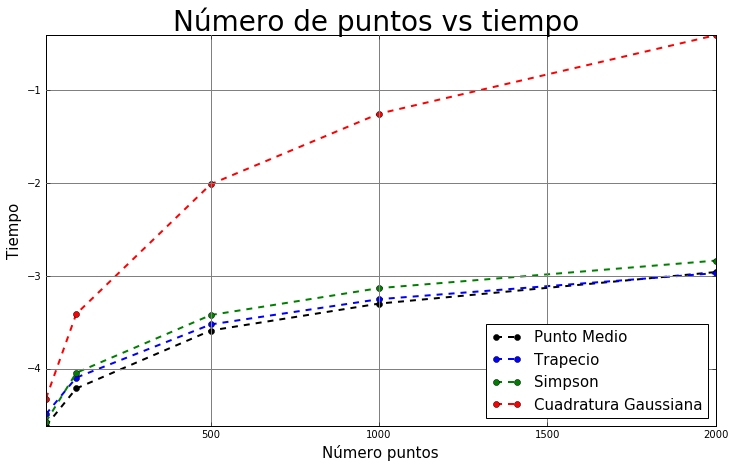

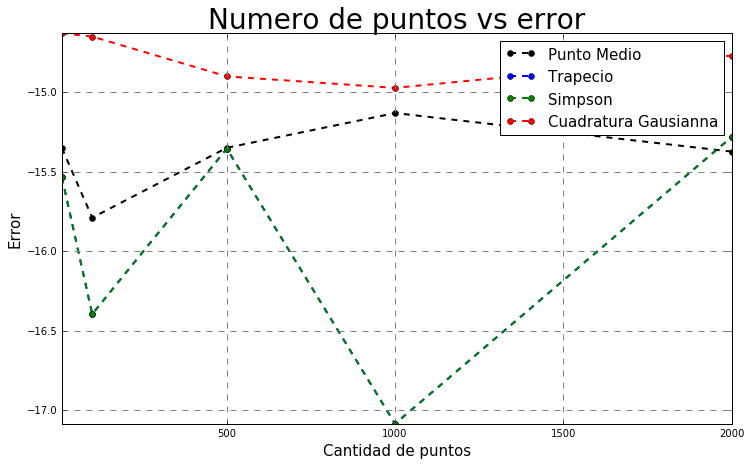

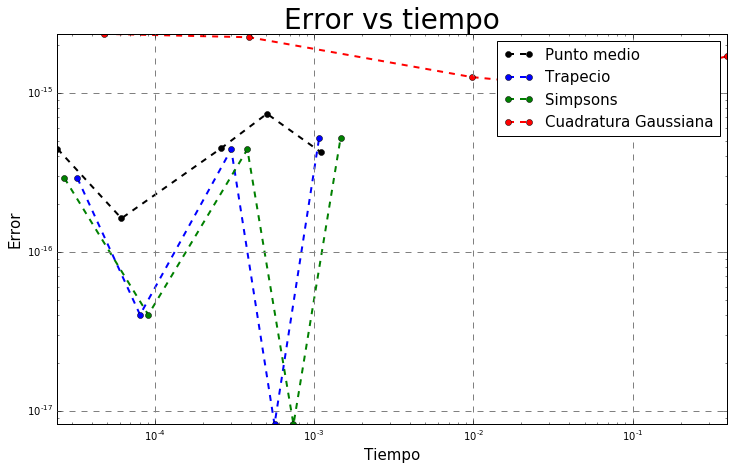

In [22]:
imprimir_3_graficos(tiempo[0],error[0])

Vemos que en los tiempos esta integral nos dice que los 3 metodos se comportan casi del mismo modo. Sin embargo, es cuadratura gaussiana quien se demora mas a medida que se aumentan la cantidad m de puntos. Sin embargo, del error no se puede obtener mucha información, puesto que converge muy rápido con muy pocos puntos.

### Integral 2:
\begin{align*}
\Large \int_{2}^{4} \text{log} \frac{(x-3)^2}{(2+x)^2} dx
\end{align*}

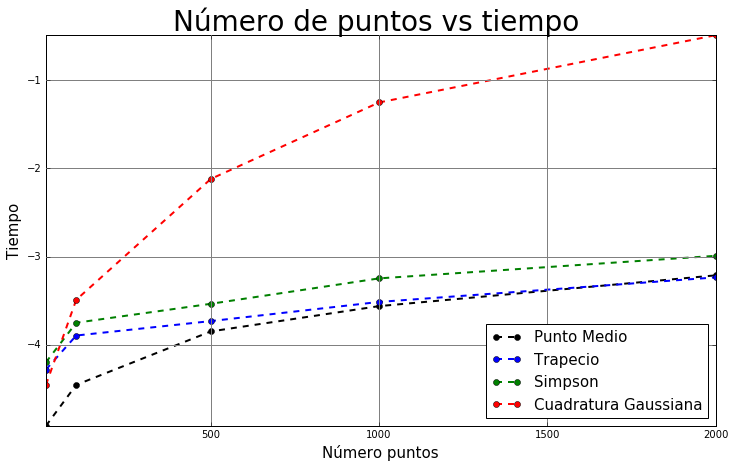

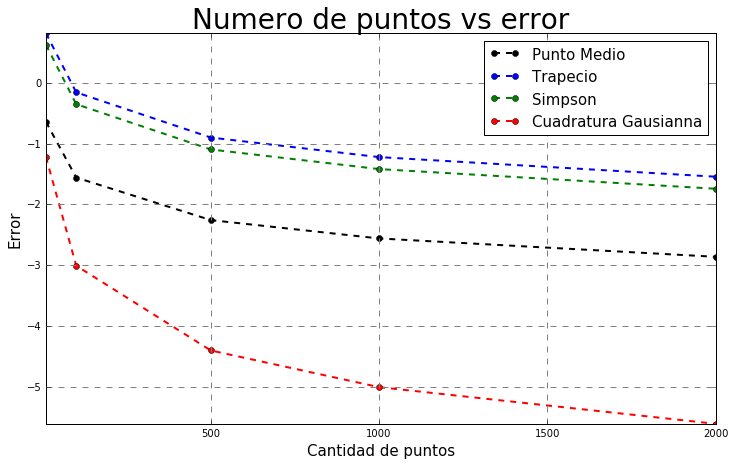

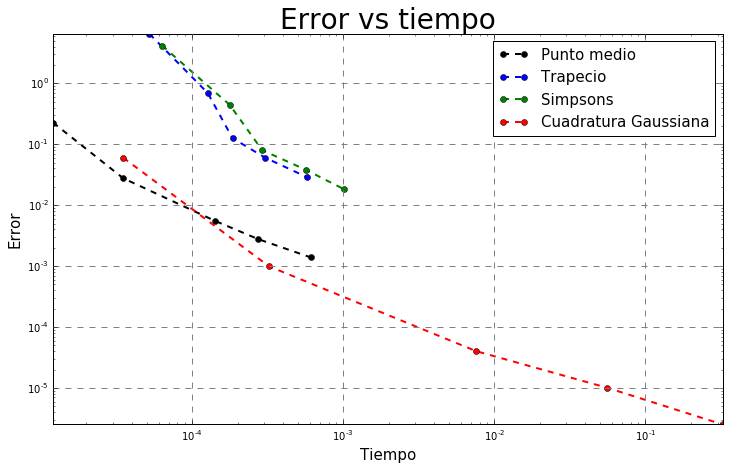

In [23]:
imprimir_3_graficos(tiempo[1],error[1])

Al igual que en el gráfico anterior, cuadratura se demora mas que el resto en tiempo, mientras que los otros 3 metodos se comportan muy similar. Aqui vemos que cuadratura cuadratura se comporta muy bien a medida que el tiempo aumenta, puesto que en el tercer grafico vemos que el error disminuye mucho en comparacion a los otros graficos.

### Integral 3:
\begin{align*}
\Large \int_{-5}^{5} e^{-\frac{1}{x^2}} dx 
\end{align*}

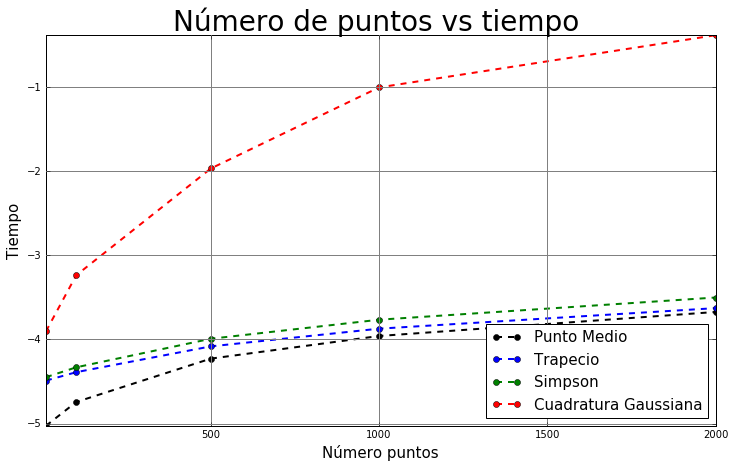

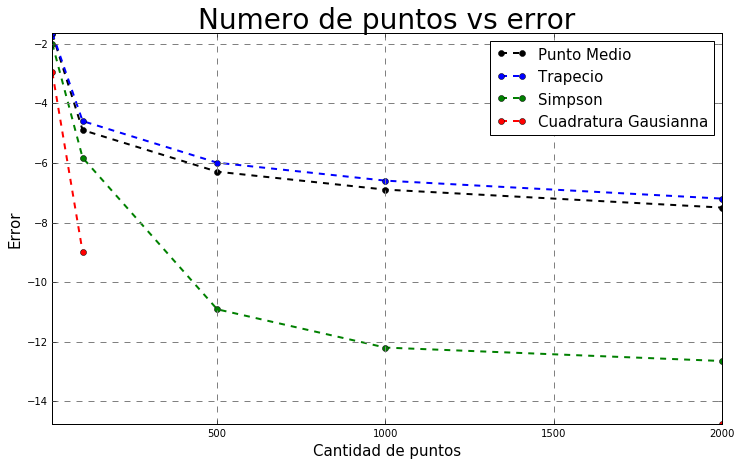

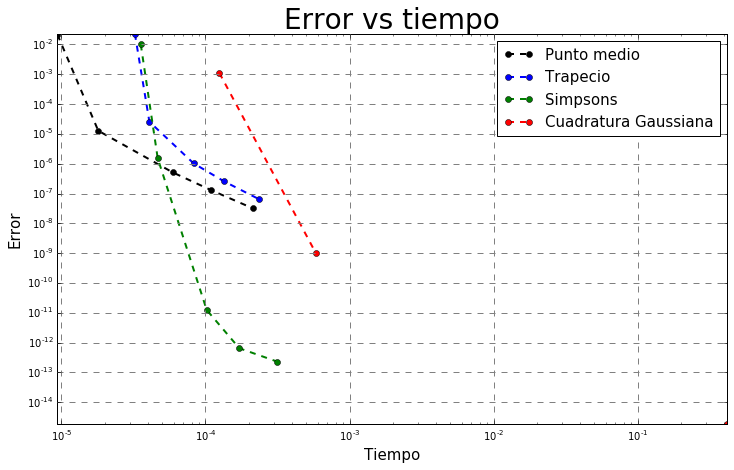

In [24]:
imprimir_3_graficos(tiempo[2],error[2])

Al igual que en el gráfico anterior, cuadratura se demora mas que el resto en tiempo, mientras que los otros 3 metodos se comportan muy similar. Aqui vemos que cuadratura cuadratura se comporta muy bien a medida que el tiempo aumenta, puesto que en el tercer grafico vemos que el error disminuye mucho en comparacion a los otros graficos.

### Integral 4:

\begin{align*}
\Large \int_{0}^{\frac{3\pi}{4}} \frac{\sqrt{1 - \sin(x)^2}}{\sqrt{1 + \cot(x)^2}} dx
\end{align*}

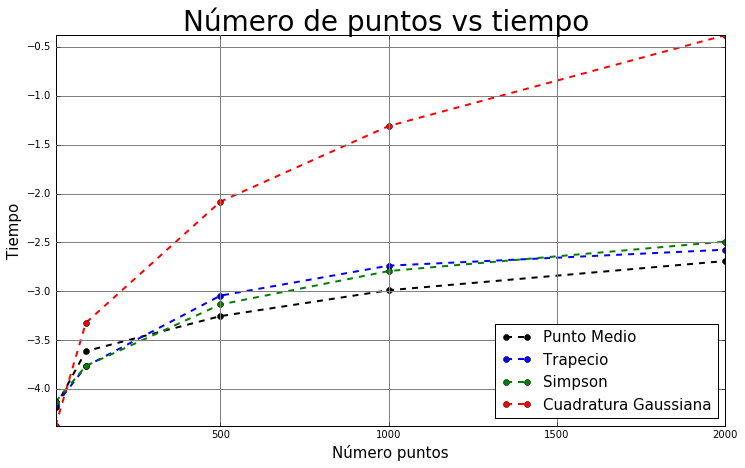

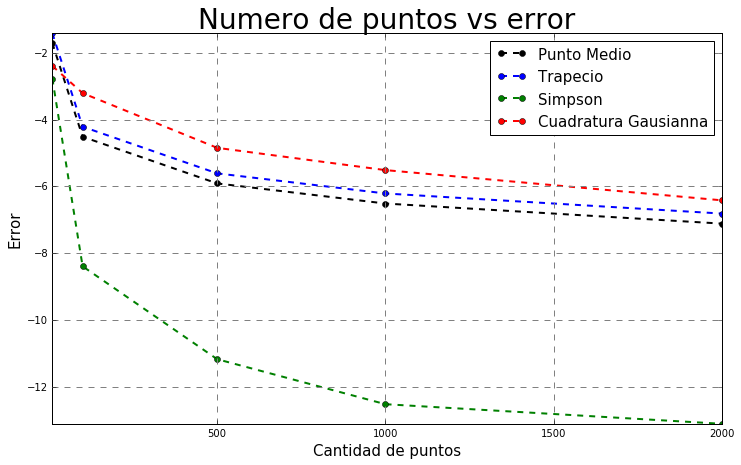

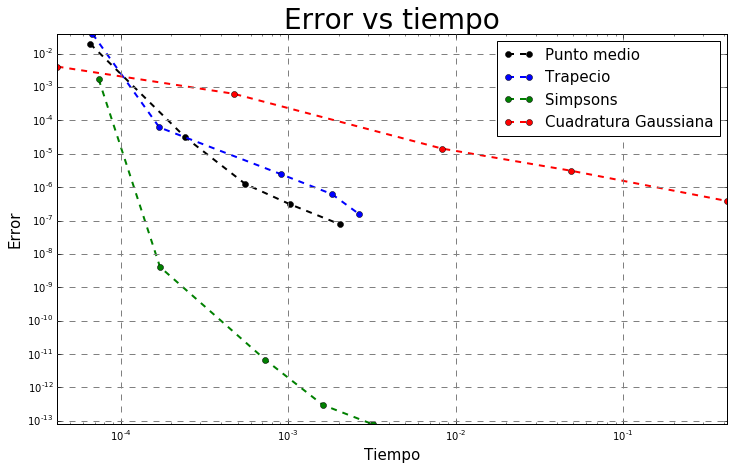

In [ ]:
imprimir_3_graficos(tiempo[3],error[3])

Al igual que en el gráfico anterior, cuadratura se demora mas que el resto en tiempo, mientras que los otros 3 metodos se comportan muy similar. Aqui vemos que simpson se comporta muy bien a medida que el tiempo aumenta en comparacion a otros metodos, sobretodo a cuadratura gaussiana, puesto que en el tercer grafico vemos que el error disminuye mucho en comparacion a los otros graficos. Podemos deducir que se debe debido a la forma que tiene la función dentro de la integral.

### Integral 5:
\begin{align*}
\Large \int_{e}^{2e} \text{log log } x \text{ } dx
\end{align*}

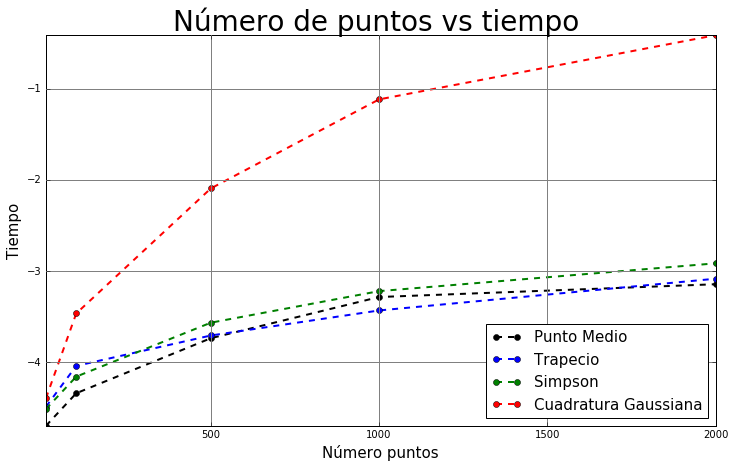

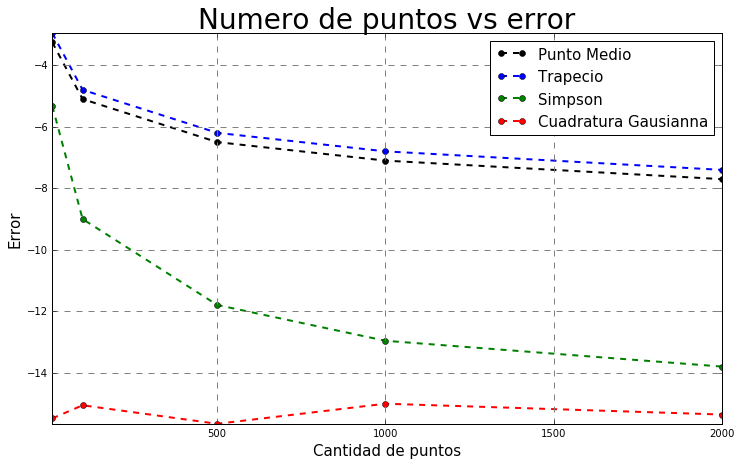

In [ ]:
imprimir_3_graficos(tiempo[4],error[4])

Al igual que en el gráfico anterior, cuadratura se demora mas que el resto en tiempo, mientras que los otros 3 métodos se comportan muy similar. Vemos que en comparación a los otros métodos, cuadratura ya parte con un error muy pequeño con muy pocos puntos, manteniendose estable a medida que aumento los puntos.

### Integral 6:

\begin{align*}
\Large \int_{\pi}^{2\pi} \frac{\sin(x)}{x} dx
\end{align*}

In [ ]:
imprimir_3_graficos(tiempo[5],error[5])

Al igual que en el gráfico anterior, cuadratura se demora mas que el resto en tiempo, mientras que los otros 3 métodos se comportan muy similar. Vemos que en comparación a los otros métodos, cuadratura ya parte con un error muy pequeño con muy pocos puntos, manteniendose estable a medida que aumento los puntos.

<div id='app' />
# Aplicación

<div id='depo' />
## De-polarización

Primero creamos una funcion para graficar la función pedida dentro de los intervalos que se encuentran en la integral:

In [ ]:
def grafica_funcion(Nrange, myfun, a, b, true_value):
    ms = 10
    f = np.vectorize(myfun) # So we can apply it to arrays without trouble
    plt.figure(figsize=(12,16))
    # First plot
    ax = plt.subplot(4,1,1)
    dd = 0.1*(b-a)
    x = np.linspace(a-dd, b+dd, 1000)
    plt.plot(x, f(x), 'k', label="f(x)", lw=2.0)
    x = np.linspace(a, b, 1000)
    plt.fill_between(x, f(x), 0, alpha=0.5, label=r"$\int_a^b f(x) dx$")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    ymax = 1.05*plt.ylim()[1]
    plt.ylim([-ymax, ymax])
    plt.grid('on')
    plt.legend(loc="lower left")

<div id='pregunta21' />
### Pregunta 1

Para calcular la integral del enunciado, nos basaremos en el análisis descrito en la pregunta 3. Como nos dimos cuenta, hay un método que nos calcula de una forma muy precisa y en poco tiempo una integral siempre y cuando esta no se indefina,el cual es cuadratura gaussiana (a pesar de que es un algoritmo costoso, y que por ende es el que se demora más en integrales indefinidas). Definiremos la función y calculamos la integral:

In [ ]:
#Función a definir
funPregunta21 = lambda x : (6.73*x + 4.3025*10**-7)/(x*2.316*10**-11)

#Intervalos de la integral
int1_funPregunta21 = 0.61*10**-6; int2_funPregunta21 = 1.22*10**-6

#Numero de puntos
m = 1000

#Valor teorico
v_teorico = 190140

#Resolvemos la función:
print("valor experimental T: " + str(cuadratura_gaussiana(funPregunta21, m, int1_funPregunta21, int2_funPregunta21)))

Luego, graficamos la integral con la función creada anteriormente:

In [ ]:
Ns = range(4, 20)
exp1 = (Ns, funPregunta21, int1_funPregunta21, int2_funPregunta21, v_teorico)
grafica_funcion(*exp1)

<div id='pregunta22' />
### Pregunta 2

Calculamos el error absoluto relativo mediante la formula:

In [ ]:
v_experimental = cuadratura_gaussiana(funPregunta21, m, int1_funPregunta21, int2_funPregunta21)
error_absoluto_relativo = abs(v_teorico - v_experimental)/v_teorico
print("Error relativo absoluto = " + str(error_absoluto_relativo)  + "%.")

El cual nos da un error bastante aceptable, por lo cual podemos decir que el metodo usado es bastante eficiente para calcular el valor de esta integral.

<div id='ten' />
## Tensión eficaz

<div id='pregunta31' />
### Pregunta 1

Al igual que en la pregunta 2.1, para calcular la integral del enunciado, nos basaremos en el análisis descrito en la pregunta 3, por lo que usaremos cuadratura gaussiana para el calculo de la integral. Definiremos la función y calculamos la integral:

In [ ]:
#Función a definir
w = 7
v_0 = 5
funPregunta22 = lambda x : ((v_0)**2)*(np.sin(x*w)**2)

#Intervalos de la integral
int1_funPregunta22 = 0; int2_funPregunta22 = (2*np.pi)/w

#Numero de puntos
m = 1000

#Valor Teorico
v_teorico = v_0/(np.sqrt(2))

#Resolvemos la función:
print("Valor experimental: " + str(np.sqrt((w/(2*np.pi))*cuadratura_gaussiana(funPregunta22, m, int1_funPregunta22, int2_funPregunta22))))

Luego graficamos la integral:

In [ ]:
Ns = range(4, 20)
exp2 = (Ns, funPregunta22, int1_funPregunta22, int2_funPregunta22, v_teorico)
grafica_funcion(*exp2)

<div id='pregunta32' />
### Pregunta 2

Calculamos el error absoluto relativo para verificar si nuetro metodo calcula un valor cercano a real:

In [ ]:
v_experimental = np.sqrt((w/(2*np.pi))*cuadratura_gaussiana(funPregunta22, m, int1_funPregunta22, int2_funPregunta22))
error_absoluto_relativo = abs(v_teorico - v_experimental)/v_teorico
print("Error relativo absoluto = " + str(error_absoluto_relativo)  + "%.")

Vemos que el error es un número bastante mas pequeño que el cálculo de la primera integral, lo cual nos dice que acertamos en nuestra predicción.

<div id='alg' />
# Conclusiones

Luego de realizar el laboratorio, nos damos cuenta de que dependiendo de lo que buscamos podemos usar distintos metodos que nos ayudaran a realizar un calculo de integración. Si queremos un cálculo en menos tiempo, punto medio es la mejor opcion, puesto que hace un calculo facil en poco tiempo. Sin embargo, el error que nos entrega este metodo es un poco más alto en comparación a otros métodos, como cuadratura gaussiana. Esta elección también depende de como se comporte la integral en su intervalo, como tambien de la forma de la integral (si es lineal, cudratica, etc). En conclusión, la elección dependerá de lo que se ande buscando (precision, tiempo, etc). 

<div id='ref' />
# Referencias

- Capitulo 5 "Diferenciacion e integracion numerica" del libro "Análisis Numérico - Segunda Edición" del autor Tymothy Sauer.

- http://www.epsem.upc.edu/~fpq/numerico/resum/integra-resum.pdf